<a href="https://colab.research.google.com/github/laxmiharikumar/deeplearning/blob/main/nlp_fundamentals_rnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction to NLP

In [1]:
# Get the data
!wget "https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip"

--2023-01-30 17:35:12--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.99.128, 173.194.203.128, 74.125.20.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.99.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.005s  

2023-01-30 17:35:12 (124 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



In [2]:
import zipfile

zip_file = zipfile.ZipFile("nlp_getting_started.zip")
zip_file.extractall()
zip_file.close()

In [3]:
## Visualize the data
import pandas as pd

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")


In [4]:
train_df_shuffled = train_df.sample(frac=1, random_state=42)
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [5]:
# How many examples of each target
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [6]:
# Lets visualize some code
import random

# random.seed(42)
random_index = random.randint(0, len(train_df_shuffled)-5)
for row in train_df_shuffled[["text", "target"]][random_index:random_index+5].itertuples():
  _, text, target = row
  print(f"Target: {target}", "(real_disaster)" if target > 0 else "(not a real disaster)")
  print(f"Text is: {text}")
  print("------------------\n")

Target: 1 (real_disaster)
Text is: I agree with certain cultural appropriation things but honestly if u looked at my house it screams appropriation bc Buddhas and stuff-
------------------

Target: 1 (real_disaster)
Text is: @chrisroth98 @chaselabsports in an emergency situation late in the year. Not as a plan in camp
------------------

Target: 1 (real_disaster)
Text is: @onihimedesu the whole city is trapped! You can't leave the city! This was supposed to be a normal sports manga wit a love triangle (c)
------------------

Target: 0 (not a real disaster)
Text is: The good thing is that the #Royals won't face a newbie in the playoffs. No real reason to panic.
------------------

Target: 1 (real_disaster)
Text is: Our Chemical Spill Cleanup videos will prepare you for an emergency situation in the lab. http://t.co/UMQbyRUPBd
------------------



In [7]:
# Split the data into training and validation sets
from sklearn.model_selection import train_test_split

In [8]:
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled["text"].to_numpy(),
                                                                            train_df_shuffled["target"].to_numpy(),
                                                                            test_size=0.1,
                                                                            random_state=42)

In [9]:
# Check 10 samples
train_sentences[:10], train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object), array([0, 

## Convert Text to Numbers

1. Tokenization
2. Embedding

In [10]:
import tensorflow as tf
from keras.layers import TextVectorization

In [11]:
text_vectorizer = TextVectorization(max_tokens=None,
                                    standardize="lower_and_strip_punctuation",
                                    split="whitespace",
                                    ngrams=None,
                                    output_mode="int",
                                    output_sequence_length=None, # how long do you want your sequences to be
                                    pad_to_max_tokens=False)

In [12]:
# Find the average number of words in a sentence
max_length = 0;
for i in train_sentences:
  max_length = max_length + len(i)
max_length = max_length / len(train_sentences)
max_length

100.84294263611152

In [13]:
round(sum([len(i.split()) for i in train_sentences]))

102087

In [14]:
max_vocab_length = 10000
max_length = round(sum([len(i.split()) for i in train_sentences]) / len(train_sentences))
max_length

15

In [15]:
text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length,
                                    pad_to_max_tokens=True)

In [16]:
# Fit the text vectorizer to the train sentences
text_vectorizer.adapt(train_sentences)

In [17]:
# Create a sample sentence and tokenize it
sample_sentence="There's a flood in my street!"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[264,   3, 232,   4,  13, 698,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [18]:
## See top 5 and bottom 5 words 
all_words = text_vectorizer.get_vocabulary()
print(f"Number of words: {len(all_words)}")
print(f"Top 5 words: {all_words[:5]}")
print(f"Bottom 5 words: {all_words[-5:]}")

Number of words: 10000
Top 5 words: ['', '[UNK]', 'the', 'a', 'in']
Bottom 5 words: ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


### Embedding
To create an embedding we use Tensorflow's Embedding layer

Parameters
* `input_dim` - size of vocab (10000)
* `output_dim` - size of each output embedding vector
* `input_length` - length of sequences being passed to embedding layer (15) 

In [19]:
embedding = tf.keras.layers.Embedding(input_dim = max_vocab_length,
                                      output_dim = 128,
                                      input_length = max_length)

In [20]:
sample_sentence = random.choice(train_sentences)
print(f"The sentence is: {sample_sentence}")

The sentence is: [FORBES]: China's Stock Market Crash: Are There Gems In The Rubble?: ChinaÛªs stock market crash this summer ha... http://t.co/Q4grDpAjr5


In [21]:
embed_op = embedding(text_vectorizer([sample_sentence]))
embed_op

<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[ 0.02232242,  0.02932468,  0.00600551, ...,  0.02069578,
          0.00369277,  0.04627557],
        [ 0.02465335,  0.0436311 ,  0.02291353, ..., -0.00254939,
          0.0475494 ,  0.02823862],
        [-0.01028813, -0.00735694,  0.03702829, ...,  0.04081659,
          0.02261343, -0.00619673],
        ...,
        [-0.01028813, -0.00735694,  0.03702829, ...,  0.04081659,
          0.02261343, -0.00619673],
        [ 0.04110651, -0.01615789,  0.02821826, ...,  0.00264532,
          0.0241184 , -0.0314966 ],
        [-0.01624342, -0.02205875,  0.00315202, ..., -0.0133245 ,
         -0.04844877,  0.02552139]]], dtype=float32)>

### Model 0 - Baseline model with scikit - Text Classification with Multinomial Naive Bayes

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer ## Convert text to numbers
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [23]:
# Create tokenization and modeling pipeline
model_0 = Pipeline([
                  ("tfidf", TfidfVectorizer()),
                  ("clf", MultinomialNB())
])

# Fit the pipeline to the training data
model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [24]:
# Evaluate out baseline model
baseline_score = model_0.score(val_sentences, val_labels)
print(f"The score of baseline model is: {baseline_score*100:.2f}%")

The score of baseline model is: 79.27%


In [25]:
# Make Predictions
baseline_preds = model_0.predict(val_sentences)
print(f"Baseline model predictions: {baseline_preds[:10]}")
print(f"Actual values: {val_labels[:10]}")

Baseline model predictions: [1 1 1 0 0 1 1 1 1 0]
Actual values: [0 0 1 1 1 1 1 1 1 0]


In [26]:
# Function that returns evaluation metrics
from sklearn import metrics

def calculate_results(y_true, y_pred):
  eval_metrics = {}
  eval_metrics["accuracy"] = metrics.accuracy_score(y_true, y_pred) * 100
  eval_metrics["precision"] = metrics.precision_score(y_true, y_pred) * 100
  eval_metrics["recall"] = metrics.recall_score(y_true, y_pred) * 100
  eval_metrics["f1_score"] = metrics.f1_score(y_true, y_pred) * 100

  return eval_metrics

In [27]:
baseline_results = calculate_results(val_labels, baseline_preds)
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 88.6178861788618,
 'recall': 62.643678160919535,
 'f1_score': 73.4006734006734}

### Model 1 - Feed forward neural network (A simple dense model)

In [28]:
# Create a tensorboard callback (need to create a new one for each model)

import datetime

def create_tensorboard_callback(dir_name, experiment_name):
  """
  Creates a TensorBoard callback instand to store log files.

  Stores log files with the filepath:
    "dir_name/experiment_name/current_datetime/"

  Args:
    dir_name: target directory to store TensorBoard log files
    experiment_name: name of experiment directory (e.g. efficientnet_model_1)
  """
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback


In [29]:
SAVE_DIR = "model_logs"

In [30]:
# Build a model using functional API
inputs = tf.keras.layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = tf.keras.layers.GlobalAveragePooling1D()(x) # Condense the feature vector for each tokento one vector
outputs = tf.keras.layers.Dense(1, activation="sigmoid")(x)
model_1 = tf.keras.Model(inputs,outputs, name="model_1_dense")

In [31]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [32]:
# Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [33]:
# Fit the model
model_1_history = model_1.fit(x=train_sentences,
                              y=train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name="model_1_dense")]
                        )

Saving TensorBoard log files to: model_logs/model_1_dense/20230130-173523
Epoch 1/5
215/215 [==============================] - 6s 22ms/step - loss: 0.6092 - accuracy: 0.6942 - val_loss: 0.5330 - val_accuracy: 0.7598
Epoch 2/5
215/215 [==============================] - 4s 17ms/step - loss: 0.4405 - accuracy: 0.8184 - val_loss: 0.4676 - val_accuracy: 0.7848
Epoch 3/5
215/215 [==============================] - 3s 16ms/step - loss: 0.3464 - accuracy: 0.8621 - val_loss: 0.4574 - val_accuracy: 0.7835
Epoch 4/5
215/215 [==============================] - 4s 19ms/step - loss: 0.2839 - accuracy: 0.8920 - val_loss: 0.4636 - val_accuracy: 0.8005
Epoch 5/5
215/215 [==============================] - 3s 14ms/step - loss: 0.2373 - accuracy: 0.9134 - val_loss: 0.4818 - val_accuracy: 0.7927


In [34]:
model_1.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 3ms/step - loss: 0.4818 - accuracy: 0.7927


[0.4818454086780548, 0.7926509380340576]

In [35]:
model_1_preds = model_1.predict(val_sentences)
model_1_preds[:10]

24/24 [==============================] - 0s 2ms/step


array([[0.31638706],
       [0.7882726 ],
       [0.9979024 ],
       [0.09799066],
       [0.08610642],
       [0.93556076],
       [0.8976067 ],
       [0.9926884 ],
       [0.96369064],
       [0.24726598]], dtype=float32)

In [36]:
# Convert model prediction probabilities into labels
model_1_preds = tf.squeeze(tf.round(model_1_preds))

In [37]:
model_1_results = calculate_results(val_labels, model_1_preds)
model_1_results

{'accuracy': 79.26509186351706,
 'precision': 84.17266187050359,
 'recall': 67.24137931034483,
 'f1_score': 74.76038338658147}

In [38]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 88.6178861788618,
 'recall': 62.643678160919535,
 'f1_score': 73.4006734006734}

In [39]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [40]:
# Get the weight matrix of embedding layer
# these are the numerical representations of each token in our training data, which have been learned for 5 epochs
embed_weights = model_1.get_layer("embedding").get_weights()[0]
embed_weights.shape # same as vocab size and embedding dim

(10000, 128)

### RNNs

Premise of a recurrent neural network is to use the representation of a previous input to aid the representation of a later input

To Read
1. MIT's sequence modelling lecture
2. Chris Olah's intro to LSTM
3. word2vec
4. Word Embeddings
5. Unreasonable effectiveness of RNNs

### Model 2 - LSTM

Long Short Term Memory 

Structure of an RNN 
- Input (text) -> Tokenize -> Embedding-> Layers (RNNs/dense) ->  Output (label probability)

In [41]:
# Build a model using functional API
inputs = tf.keras.layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
print(f"After emedding the shape is: {x.shape}")
# x = tf.keras.layers.LSTM(units=64, return_sequences=True)(x) # when you stack LSTM layers you need to return sequences
# print(f"After first LSTM the shape is: {x.shape}")
x = tf.keras.layers.LSTM(64)(x)
print(f"After second LSTM shape is: {x.shape}")
# x = tf.keras.layers.Dense(64, activation="relu")(x)
outputs = tf.keras.layers.Dense(1, activation="sigmoid")(x)
model_2 = tf.keras.Model(inputs, outputs, name="model_2_lstm")

After emedding the shape is: (None, 15, 128)
After second LSTM shape is: (None, 64)


In [42]:
# Get a summary
model_2.summary()

Model: "model_2_lstm"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,329,473
Trainable params: 1,329,473
Non-trainable params: 0
____________________________________________

In [43]:
# Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [44]:
# Fit the model
model_2_history = model_2.fit(x=train_sentences,
                              y=train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name="model_2_lstm")])

Saving TensorBoard log files to: model_logs/model_2_lstm/20230130-173544
Epoch 1/5
215/215 [==============================] - 9s 29ms/step - loss: 0.2255 - accuracy: 0.9229 - val_loss: 0.5545 - val_accuracy: 0.7795
Epoch 2/5
215/215 [==============================] - 5s 25ms/step - loss: 0.1570 - accuracy: 0.9399 - val_loss: 0.5734 - val_accuracy: 0.7848
Epoch 3/5
215/215 [==============================] - 5s 25ms/step - loss: 0.1283 - accuracy: 0.9539 - val_loss: 0.7379 - val_accuracy: 0.7861
Epoch 4/5
215/215 [==============================] - 5s 25ms/step - loss: 0.1032 - accuracy: 0.9610 - val_loss: 0.8405 - val_accuracy: 0.7769
Epoch 5/5
215/215 [==============================] - 6s 26ms/step - loss: 0.0867 - accuracy: 0.9670 - val_loss: 0.7964 - val_accuracy: 0.7743


In [45]:
# Make predictions with model 2
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs[:10]

24/24 [==============================] - 1s 5ms/step


array([[0.0267761 ],
       [0.9381182 ],
       [0.9997579 ],
       [0.12160273],
       [0.00195582],
       [0.99881095],
       [0.61803955],
       [0.99984014],
       [0.9996978 ],
       [0.8466443 ]], dtype=float32)

In [46]:
# Convert pred probabilities to labels
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [47]:
# Calculate model_2 results
model_2_results = calculate_results(val_labels, model_2_preds)
model_2_results

{'accuracy': 77.42782152230971,
 'precision': 78.38709677419354,
 'recall': 69.82758620689656,
 'f1_score': 73.86018237082067}

### Model 3 - RNN using GRU

Gated Recurrent Unit

GRU cell has similar features to LSTM but has lower number of parameters

In [48]:
# Build using functional API
inputs = tf.keras.layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = tf.keras.layers.GRU(units=64)(x)
outputs=tf.keras.layers.Dense(1, activation="sigmoid")(x)
model_3 = tf.keras.Model(inputs, outputs, name="model_3_gru")

In [49]:
# Get the model summary
model_3.summary()

Model: "model_3_gru"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,317,313
Trainable params: 1,317,313
Non-trainable params: 0
_____________________________________________

In [50]:
# Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [51]:
# Fit the model
model_3_history = model_3.fit(x=train_sentences,
                              y=train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                    experiment_name="model_3_gru")])

Saving TensorBoard log files to: model_logs/model_3_gru/20230130-173629
Epoch 1/5
215/215 [==============================] - 8s 28ms/step - loss: 0.1555 - accuracy: 0.9397 - val_loss: 0.7147 - val_accuracy: 0.7769
Epoch 2/5
215/215 [==============================] - 6s 26ms/step - loss: 0.0865 - accuracy: 0.9686 - val_loss: 0.7686 - val_accuracy: 0.7756
Epoch 3/5
215/215 [==============================] - 5s 25ms/step - loss: 0.0726 - accuracy: 0.9727 - val_loss: 0.8516 - val_accuracy: 0.7782
Epoch 4/5
215/215 [==============================] - 5s 25ms/step - loss: 0.0646 - accuracy: 0.9736 - val_loss: 1.0030 - val_accuracy: 0.7677
Epoch 5/5
215/215 [==============================] - 5s 25ms/step - loss: 0.0566 - accuracy: 0.9758 - val_loss: 1.2188 - val_accuracy: 0.7795


In [52]:
# Get the predictions
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs[:10]

24/24 [==============================] - 1s 5ms/step


array([[6.1188563e-04],
       [8.8688797e-01],
       [9.9991959e-01],
       [2.6869206e-02],
       [7.0458103e-05],
       [9.9965268e-01],
       [6.9776696e-01],
       [9.9996084e-01],
       [9.9989557e-01],
       [8.1344277e-01]], dtype=float32)

In [53]:
# Convert pred probabilities to labels
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [54]:
# Get model_3 results
model_3_results = calculate_results(val_labels, model_3_preds)
model_3_results

{'accuracy': 77.95275590551181,
 'precision': 80.4054054054054,
 'recall': 68.39080459770115,
 'f1_score': 73.91304347826086}

### Model 4: Bidirectional RNN

Normal RNNs go from left to right. However bidirectional RNN goes from left to right and right to left

In [55]:
# Build a bidirectional RNN in tensorflow
inputs = tf.keras.layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=64))(x)
# x = tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64))(x)
outputs=tf.keras.layers.Dense(1, activation="sigmoid")(x)
model_4 = tf.keras.Model(inputs, outputs, name="model_4_bidirectional")

In [56]:
# Get the model summary
model_4.summary()

Model: "model_4_bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              98816     
 l)                                                              
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,378,945
Trainable params: 1,3

In [57]:
# Compile the model
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [58]:
# Fit the model
model_4_history = model_4.fit(x=train_sentences,
                              y=train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name="model_4_bidirectional")])

Saving TensorBoard log files to: model_logs/model_4_bidirectional/20230130-173701
Epoch 1/5
215/215 [==============================] - 12s 40ms/step - loss: 0.1028 - accuracy: 0.9714 - val_loss: 0.9465 - val_accuracy: 0.7651
Epoch 2/5
215/215 [==============================] - 8s 35ms/step - loss: 0.0531 - accuracy: 0.9781 - val_loss: 1.1484 - val_accuracy: 0.7690
Epoch 3/5
215/215 [==============================] - 8s 35ms/step - loss: 0.0477 - accuracy: 0.9788 - val_loss: 1.2721 - val_accuracy: 0.7690
Epoch 4/5
215/215 [==============================] - 8s 35ms/step - loss: 0.0413 - accuracy: 0.9809 - val_loss: 1.4030 - val_accuracy: 0.7717
Epoch 5/5
215/215 [==============================] - 7s 34ms/step - loss: 0.0408 - accuracy: 0.9810 - val_loss: 1.5592 - val_accuracy: 0.7651


In [59]:
# Make predictions
model_4_pred_probs = model_4.predict(val_sentences)
model_4_pred_probs[:10]

24/24 [==============================] - 1s 7ms/step


array([[9.2025660e-04],
       [7.8108734e-01],
       [9.9998540e-01],
       [1.7384981e-01],
       [2.5186600e-05],
       [9.9991620e-01],
       [9.5139456e-01],
       [9.9999219e-01],
       [9.9998474e-01],
       [9.9951595e-01]], dtype=float32)

In [60]:
# Convert pred probs into labels
model_4_pred = tf.squeeze(tf.round(model_4_pred_probs))
model_4_pred[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [61]:
# Calculate results
model_4_results = calculate_results(val_labels, model_4_pred)
model_4_results

{'accuracy': 76.50918635170603,
 'precision': 77.70491803278688,
 'recall': 68.10344827586206,
 'f1_score': 72.58805513016846}

### Model 5 - Conv1D

Typical structure:

Inputs(text) -> Tokenization -> Embedding -> Layers (Conv1D + Pooling) -> Outputs (class probabilities)

In [62]:
# Build using functional API
inputs=tf.keras.layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
print(f"Shape after embedding: {x.shape}")
x = tf.keras.layers.Conv1D(filters=64, # number of hidden units
                           kernel_size=5, # look at 5 words at a time
                           strides=1,
                           activation="relu",
                           padding="valid")(x) # padding is often necessary when the kernel extends beyond the activation map. valid means output is smaller than input shape.  same means output is same as input shape.
print(f"Shape after conv1D: {x.shape}")
x = tf.keras.layers.GlobalMaxPooling1D()(x) # condenses the max value from all 15 tokens to 1 value. equivalent to "get the most important features" or "get the feature with the highest value"
print(f"Shape after maxpool: {x.shape}")
outputs = tf.keras.layers.Dense(1, activation="sigmoid")(x)
print(f"Shape after dense: {outputs.shape}")
model_5 = tf.keras.Model(inputs, outputs, name="model_5_conv1D")

Shape after embedding: (None, 15, 128)
Shape after conv1D: (None, 11, 64)
Shape after maxpool: (None, 64)
Shape after dense: (None, 1)


In [63]:
# Get the model summary
model_5.summary()

Model: "model_5_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 conv1d (Conv1D)             (None, 11, 64)            41024     
                                                                 
 global_max_pooling1d (Globa  (None, 64)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_4 (Dense)             (None, 1)              

In [64]:
# Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [65]:
# Fit the model
model_5_history = model_5.fit(x=train_sentences,
                              y=train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name="model_5_conv1D")])

Saving TensorBoard log files to: model_logs/model_5_conv1D/20230130-173747
Epoch 1/5
215/215 [==============================] - 5s 19ms/step - loss: 0.1216 - accuracy: 0.9596 - val_loss: 0.9218 - val_accuracy: 0.7638
Epoch 2/5
215/215 [==============================] - 4s 18ms/step - loss: 0.0727 - accuracy: 0.9724 - val_loss: 1.0742 - val_accuracy: 0.7690
Epoch 3/5
215/215 [==============================] - 6s 28ms/step - loss: 0.0602 - accuracy: 0.9771 - val_loss: 1.1605 - val_accuracy: 0.7546
Epoch 4/5
215/215 [==============================] - 5s 22ms/step - loss: 0.0534 - accuracy: 0.9780 - val_loss: 1.1886 - val_accuracy: 0.7664
Epoch 5/5
215/215 [==============================] - 7s 34ms/step - loss: 0.0509 - accuracy: 0.9777 - val_loss: 1.2671 - val_accuracy: 0.7520


In [66]:
# Make the predictions
model_5_pred_probs = model_5.predict(val_sentences)
model_5_pred_probs[:10]

24/24 [==============================] - 0s 3ms/step


array([[8.0529615e-02],
       [1.1610267e-01],
       [9.9996418e-01],
       [6.4867854e-02],
       [4.2408708e-08],
       [9.9581158e-01],
       [9.3677980e-01],
       [9.9997193e-01],
       [9.9999958e-01],
       [9.4686157e-01]], dtype=float32)

In [67]:
# Convert pred probs to labels
model_5_pred = tf.squeeze(tf.round(model_5_pred_probs))
model_5_pred[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [68]:
# Calculate results
model_5_results = calculate_results(val_labels, model_5_pred)
model_5_results

{'accuracy': 75.19685039370079,
 'precision': 75.72815533980582,
 'recall': 67.24137931034483,
 'f1_score': 71.23287671232877}

### Model 6 - Tensorflow Hub Pretrained Sentence Encoder

In [69]:
import tensorflow_hub as hub

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
embed_samples = embed(["There's a flood in my street!",
                       "when you call the universal sentence encoder on a sentence, it turns it into numbers"])
print(embed_samples[0][:50])

tf.Tensor(
[-0.01157025  0.02485911  0.02878051 -0.012715    0.03971541  0.08827761
  0.02680988  0.05589838 -0.01068731 -0.00597293  0.00639321 -0.01819516
  0.00030816  0.09105889  0.05874645 -0.03180629  0.01512474 -0.05162925
  0.00991366 -0.06865345 -0.04209306  0.0267898   0.03011009  0.00321065
 -0.00337968 -0.04787356  0.0226672  -0.00985927 -0.04063615 -0.01292093
 -0.04666382  0.05630299 -0.03949255  0.00517682  0.02495827 -0.07014439
  0.0287151   0.0494768  -0.00633978 -0.08960193  0.02807119 -0.00808364
 -0.01360601  0.05998649 -0.10361788 -0.05195372  0.00232958 -0.02332531
 -0.03758106  0.03327729], shape=(50,), dtype=float32)


In [70]:
embed_samples.shape

TensorShape([2, 512])

In [71]:
# Create a keras layer using the USE pretrained layer from Tensorflow hub
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        trainable=False,
                                        input_shape=[],
                                        dtype=tf.string,
                                        name="USE"
                                        )

In [72]:
# Create a model using the Sequential API
model_6 = tf.keras.Sequential([
     sentence_encoder_layer,
     tf.keras.layers.Dense(64, activation="relu"),
     tf.keras.layers.Dense(1, activation="sigmoid", name="output_layer")
], name="model_6_use"
)


In [73]:
# Get the summary
model_6.summary()

Model: "model_6_use"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_5 (Dense)             (None, 64)                32832     
                                                                 
 output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [74]:
# Compile the model 
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [75]:
# Fit the model
model_6_history = model_6.fit(x=train_sentences,
                              y=train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name="model_6_use")])

Saving TensorBoard log files to: model_logs/model_6_use/20230130-173853
Epoch 1/5
215/215 [==============================] - 9s 18ms/step - loss: 0.4999 - accuracy: 0.7898 - val_loss: 0.4509 - val_accuracy: 0.8058
Epoch 2/5
215/215 [==============================] - 3s 14ms/step - loss: 0.4142 - accuracy: 0.8164 - val_loss: 0.4381 - val_accuracy: 0.8031
Epoch 3/5
215/215 [==============================] - 5s 22ms/step - loss: 0.4016 - accuracy: 0.8229 - val_loss: 0.4359 - val_accuracy: 0.8110
Epoch 4/5
215/215 [==============================] - 4s 17ms/step - loss: 0.3933 - accuracy: 0.8262 - val_loss: 0.4298 - val_accuracy: 0.8123
Epoch 5/5
215/215 [==============================] - 3s 14ms/step - loss: 0.3859 - accuracy: 0.8279 - val_loss: 0.4272 - val_accuracy: 0.8136


In [76]:
# Create prediction probabilities
model_6_pred_probs = model_6.predict(val_sentences)
model_6_pred_probs[:10]

24/24 [==============================] - 1s 14ms/step


array([[0.1816508 ],
       [0.81429803],
       [0.9910014 ],
       [0.19529083],
       [0.71940243],
       [0.72637767],
       [0.983144  ],
       [0.9721768 ],
       [0.9540654 ],
       [0.08527657]], dtype=float32)

In [77]:
# Convert to labels
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [78]:
# Calculate results
model_6_results = calculate_results(val_labels, model_6_preds)
model_6_results

{'accuracy': 81.36482939632546,
 'precision': 83.44155844155844,
 'recall': 73.85057471264368,
 'f1_score': 78.35365853658537}

In [79]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 88.6178861788618,
 'recall': 62.643678160919535,
 'f1_score': 73.4006734006734}

### Model 7: TF Hub Pretrained USE with 10% of data

In [93]:
# Create a subset of 10% of training data
# Making data splits like this leads to data leakage (model_7 with 10% of data of model_6 is more accurate than model_6)
# Do not make data splits which leak data from validation / test sets into training set
# train_10_percent = train_df_shuffled[["text", "target"]].sample(frac=0.1, random_state=42)
# train_sentences_10_percent  = train_10_percent["text"].to_list()
# train_labels_10_percent = train_10_percent["target"].to_list()

In [80]:
# Making a better dataset split (no data leakage)
train_10_percent_split = int(0.1 * len(train_sentences))
train_sentences_10_percent = train_sentences[:train_10_percent_split]
train_labels_10_percent = train_labels[:train_10_percent_split]

In [82]:
# Check the distribution of counts of target
# train_10_percent["target"].value_counts()
# z = 413 / (413 + 348)
# o = 348 / (413 + 348)
# z, o
pd.Series(train_labels_10_percent).value_counts()
z = 406 / (406 + 279)
o = 279 / (406 + 279)
z, o

(0.5927007299270073, 0.4072992700729927)

In [83]:
# From tf hub get the USE layer
import tensorflow_hub as hub
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[],
                                        trainable=False,
                                        dtype=tf.string,
                                        name="USE")

In [84]:
# Create the model
model_7 = tf.keras.Sequential([
     sentence_encoder_layer,
     tf.keras.layers.Dense(64, activation="relu"),
     tf.keras.layers.Dense(1, activation="sigmoid", name="output_layer")
], name="model_7_use_correct")

In [85]:
# Get the modl summary
model_7.summary()

Model: "model_7_use_correct"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_6 (Dense)             (None, 64)                32832     
                                                                 
 output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [86]:
# Compuile the model
model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [87]:
# Fit the model
model_7_history  = model_7.fit(x=train_sentences_10_percent,
                               y=train_labels_10_percent,
                               epochs=5,
                               validation_data=(val_sentences, val_labels),
                               callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                      experiment_name="model_7_use_correct")])

Saving TensorBoard log files to: model_logs/model_7_use_correct/20230130-174305
Epoch 1/5
22/22 [==============================] - 4s 49ms/step - loss: 0.6653 - accuracy: 0.7051 - val_loss: 0.6410 - val_accuracy: 0.7493
Epoch 2/5
22/22 [==============================] - 0s 23ms/step - loss: 0.5889 - accuracy: 0.8175 - val_loss: 0.5798 - val_accuracy: 0.7651
Epoch 3/5
22/22 [==============================] - 1s 27ms/step - loss: 0.5135 - accuracy: 0.8248 - val_loss: 0.5279 - val_accuracy: 0.7730
Epoch 4/5
22/22 [==============================] - 1s 27ms/step - loss: 0.4548 - accuracy: 0.8292 - val_loss: 0.4998 - val_accuracy: 0.7795
Epoch 5/5
22/22 [==============================] - 1s 26ms/step - loss: 0.4164 - accuracy: 0.8307 - val_loss: 0.4864 - val_accuracy: 0.7835


In [88]:
# Make some predictions
model_7_pred_probs = model_7.predict(val_sentences)
model_7_pred_probs[:10]

24/24 [==============================] - 1s 10ms/step


array([[0.18454194],
       [0.538475  ],
       [0.9310242 ],
       [0.3959583 ],
       [0.5441655 ],
       [0.66555136],
       [0.90050125],
       [0.8142138 ],
       [0.8495882 ],
       [0.15255333]], dtype=float32)

In [89]:
# Convert to labels
model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [90]:
# Check the results
model_7_results = calculate_results(val_labels, model_7_preds)
model_7_results

{'accuracy': 78.34645669291339,
 'precision': 79.42122186495176,
 'recall': 70.97701149425288,
 'f1_score': 74.96206373292868}

In [114]:
model_6_results

{'accuracy': 81.49606299212599,
 'precision': 85.56701030927834,
 'recall': 71.55172413793103,
 'f1_score': 77.93427230046949}

In [115]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 88.6178861788618,
 'recall': 62.643678160919535,
 'f1_score': 73.4006734006734}

## Comparing the performance of all our model

In [95]:
all_models_results = pd.DataFrame({"0_baseline": baseline_results,
                                   "1_simple_dense": model_1_results,
                                   "2_lstm": model_2_results,
                                   "3_gru":model_3_results,
                                   "4_bidirectional": model_4_results,
                                   "5_conv1d": model_5_results,
                                   "6_tf_hub_use_encoder": model_6_results,
                                   "7_tf_hub_use_encoder_10_percent": model_7_results})
all_models_results = all_models_results.transpose()

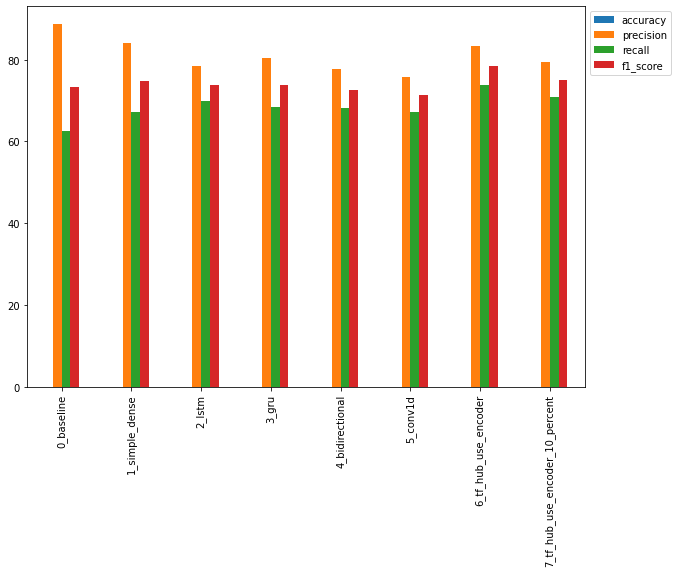

In [98]:
## Plot all the results in bar graph
all_models_results["accuracy"] = all_models_results["accuracy"] / 100
all_models_results.plot(kind="bar", figsize=(10,7)).legend(bbox_to_anchor=(1.0, 1.0))

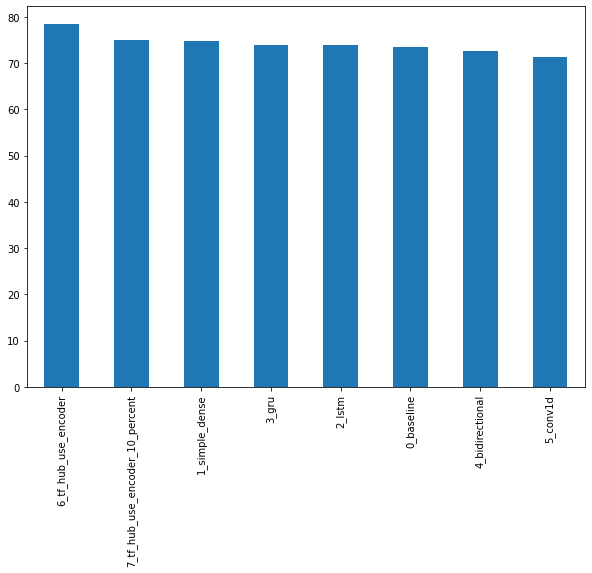

In [101]:
# Sort f1 scores in descending order and plot
all_models_results.sort_values("f1_score", ascending=False)["f1_score"].plot(kind="bar", figsize=(10,7))

## Upload training logs to Tensoboard dev